In [7]:
from __future__ import division

import time
import gzip

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap("gray")
plt.rcParams["image.interpolation"] = None

In [4]:
import TN_utils
reload(TN_utils)

<module 'TN_utils' from 'TN_utils.pyc'>

In [6]:
feature_vec_36 = TN_utils.load_featureImg_r(36)
print feature_vec_36.shape

(65536, 60, 2)


In [9]:
with gzip.open("../data/toytreerot_imgGT.npy.gz", "r") as f:
    GT_vec_array = np.load(f)
GT_vec_36 = GT_vec_array[35]

In [10]:
with gzip.open("../data/toytreerot_mask.npy.gz", "r") as f:
    mask_vec_array = np.load(f)
mask_vec_36 = mask_vec_array[35]

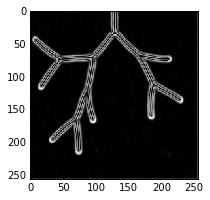

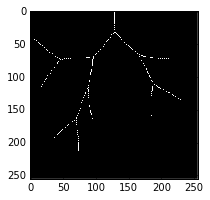

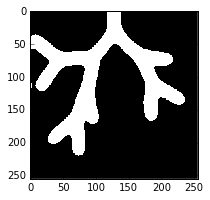

In [11]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_36, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_36, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_36.reshape((256, 256)))

In [12]:
m_feature_vec36 = feature_vec_36[mask_vec_36]
m_GT_vec36 = GT_vec_36[mask_vec_36]
print m_feature_vec36.shape, m_GT_vec36.shape

(14138, 60, 2) (14138, 2)


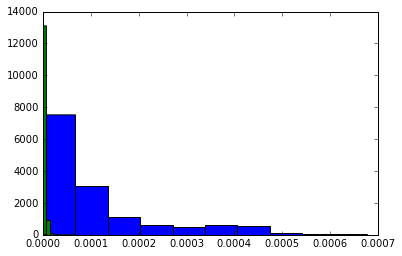

In [13]:
# V 正規化されてない
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 54])
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 58])

In [14]:
normed_m_feature_vec36, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec36)

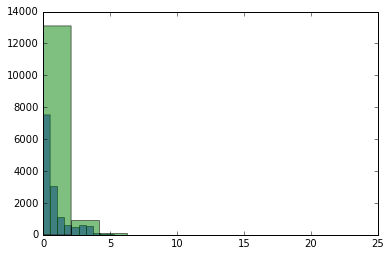

In [15]:
# V まあまあされてる
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 54], alpha=0.5)
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 58], alpha=0.5)

In [16]:
import TNN
reload(TNN)

Couldn't import dot_parser, loading of dot files will not be possible.


<module 'TNN' from 'TNN.pyc'>

In [18]:
n_hidden = 20
result = TNN.ab(normed_m_feature_vec36, m_GT_vec36,
                n_hidden=n_hidden, h_activation="ReLU", out_activation="ReLU")

In [19]:
f_train, f_cost, f_output, s_input, s_target, param2_list, a_list, b_list, bias_list = result

In [20]:
n_tensor = 60
param2_list[0].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[1].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[2].set_value(0.)
for i in range(n_hidden):
    a_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    b_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    bias_list[i].set_value(0.)

In [21]:
lr = 0.001
reg2 = 0.01
batch_size = 100
n_batchs = s_input.get_value(borrow=True).shape[0] // batch_size

n_epochs = 100
interval = 10
cost_array = np.zeros((n_epochs // interval,))

In [22]:
for i_epoch in xrange(n_epochs):
    for i_batch in xrange(n_batchs):
        f_train(i_batch, lr, reg2, batch_size)

    if i_epoch % interval == 0:
        cost = f_cost()[0]
        cost_array[i_epoch // interval] = cost
        print i_epoch, cost

0 465.160829668
10 384.333244382
20 302.854871406
30 270.126808549
40 261.800869062
50 258.066824714
60 255.72646226
70 254.217912207
80 253.152675626
90 252.422813663


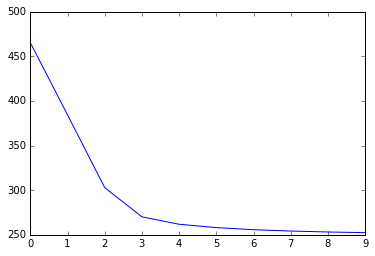

In [23]:
# V
plt.plot(cost_array)

In [28]:
import os
if not os.path.isdir("../results/toytree_confirmRC"):
    os.makedirs("../results/toytree_confirmRC")

with open("../results/toytree_confirmRC/training_cost_array.npy", "w") as f:
    np.save(f, cost_array)

gt2_vec = f_output(feature_vec_36/norm_coef[:, np.newaxis])[0]
gt1_img = TN_utils.convert_gt2vec_to_gt1img(gt2_vec, img_shape=(256, 256))
sio.savemat('../results/toytree_confirmRC/v_train.mat', {'v_train': gt1_img})

feature_vec_12 = TN_utils.load_featureImg_r(12)
gt2_vec_12 = f_output(feature_vec_12/norm_coef[:, np.newaxis])[0]
gt1_img_12 = TN_utils.convert_gt2vec_to_gt1img(gt2_vec_12, img_shape=(256, 256))
sio.savemat('../results/toytree_confirmRC/v_test.mat', {'v_test': gt1_img_12})

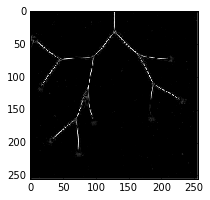

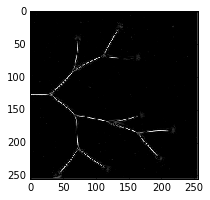

In [29]:
# V
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img, axis=0).T)

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img_9, axis=0).T)

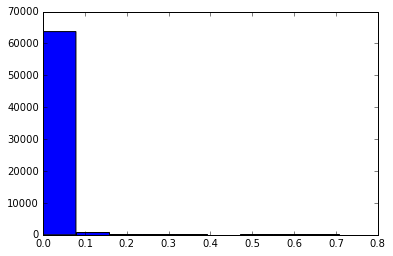

In [30]:
# V
gomi = plt.hist(np.linalg.norm(gt1_img, axis=0).flatten())